In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from IPython.display import display

In [2]:
pokemon_df = pd.read_csv("../input/dcs-ml-workshop-apr-2022/pokemon.csv")
combats_df = pd.read_csv("../input/dcs-ml-workshop-apr-2022/combats.csv")

# **Basic Data Exploration**

# `.shape`

In [3]:
# Returns a tuple - (rows, cols)
print(pokemon_df.shape)
print(combats_df.shape)

(800, 12)
(50000, 3)


# `.info()` and `.describe()`

In [5]:
pokemon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        799 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [6]:
combats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   First_pokemon   50000 non-null  int64
 1   Second_pokemon  50000 non-null  int64
 2   Winner          50000 non-null  int64
dtypes: int64(3)
memory usage: 1.1 MB


In [7]:
pokemon_df.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


# `.rename()` - Change column names

In [8]:
# You can use either function or dict to rename
pokemon_df.rename(lambda x: x.replace(" ", "").lower(), axis = 1, inplace = True)
print(pokemon_df.columns)

Index(['#', 'name', 'type1', 'type2', 'hp', 'attack', 'defense', 'sp.atk',
       'sp.def', 'speed', 'generation', 'legendary'],
      dtype='object')


In [10]:
pokemon_df.rename({
    "#": "id",
    "sp.atk": "sattack",
    "sp.def": "sdefense"
}, inplace = True, axis = 1)
print(pokemon_df.columns)

Index(['id', 'name', 'type1', 'type2', 'hp', 'attack', 'defense', 'sattack',
       'sdefense', 'speed', 'generation', 'legendary'],
      dtype='object')


In [ ]:
combats_df.rename({
    "First_pokemon": "pokemon1",
    "Second_pokemon": "pokemon2",
    "Winner": "winner"
}, axis = 1, inplace = True)
print(combats_df.columns)

# `.head()` ,  `.tail()` and `.sample()`

In [11]:
display(pokemon_df.head())    # default = top 5 rows
display(combats_df.head())

,id,name,type1,type2,hp,attack,defense,sattack,sdefense,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [12]:
display(pokemon_df.tail())
display(combats_df.tail())

,id,name,type1,type2,hp,attack,defense,sattack,sdefense,speed,generation,legendary
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True
799,800,Volcanion,Fire,Water,80,110,120,130,90,70,6,True


,First_pokemon,Second_pokemon,Winner
49995,707,126,707
49996,589,664,589
49997,303,368,368
49998,109,89,109
49999,9,73,9


In [13]:
display(pokemon_df.sample(5))   # default - single random row from the data
display(combats_df.sample(5))

,id,name,type1,type2,hp,attack,defense,sattack,sdefense,speed,generation,legendary
717,718,Genesect,Bug,Steel,71,120,95,120,95,99,5,False
116,117,Lickitung,Normal,NaN,90,55,75,60,75,30,1,False
35,36,Nidorina,Poison,NaN,70,62,67,55,55,56,1,False
56,57,Dugtrio,Ground,NaN,35,80,50,50,70,120,1,False
102,103,Mega Gengar,Ghost,Poison,60,65,80,170,95,130,1,False


,First_pokemon,Second_pokemon,Winner
45618,658,96,658
16463,121,191,191
26502,612,570,570
3331,372,135,135
41019,745,340,340


# `.isna()` - Finding missing values 

In [14]:
pokemon_null_arr = pokemon_df.isna()    # Returns boolean df
combats_null_arr = combats_df.isna() 

display(pokemon_null_arr.head())
display(combats_null_arr.head())

,id,name,type1,type2,hp,attack,defense,sattack,sdefense,speed,generation,legendary
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False


,First_pokemon,Second_pokemon,Winner
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False


In [15]:
# Use .sum() to get the number of missing values
print("Missing values in pokemon_df\n")
print(pokemon_null_arr.sum())
print("-" * 25)
print("Missing values in combats_df\n")
print(combats_null_arr.sum())

Missing values in pokemon_df

id              0
name            1
type1           0
type2         386
hp              0
attack          0
defense         0
sattack         0
sdefense        0
speed           0
generation      0
legendary       0
dtype: int64
-------------------------
Missing values in combats_df

First_pokemon     0
Second_pokemon    0
Winner            0
dtype: int64


# `.duplicated()` and `.nunique()` - Finding duplicates

In [16]:
pokemon_dup_arr = pokemon_df.duplicated()    # Returns boolean df
combats_dup_arr = combats_df.duplicated() 

display(pokemon_dup_arr.head())
display(combats_dup_arr.head())

0    False
1    False
2    False
3    False
4    False
dtype: bool

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [17]:
print(pokemon_dup_arr.sum())
print(combats_dup_arr.sum())

0
1952


In [18]:
print(pokemon_df.nunique())    # Unique items in each cols

id            800
name          799
type1          18
type2          18
hp             94
attack        111
defense       103
sattack       105
sdefense       92
speed         108
generation      6
legendary       2
dtype: int64


In [19]:
print(combats_df.nunique())

First_pokemon     784
Second_pokemon    784
Winner            783
dtype: int64


# `.value_counts()` - Explore individual columns

In [20]:
print(pokemon_df["generation"].value_counts())

1    166
5    165
3    160
4    121
2    106
6     82
Name: generation, dtype: int64


In [21]:
print(pokemon_df["type1"].value_counts())

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: type1, dtype: int64


# **Data Cleaning**

# `.dropna()` and `.drop_duplicates()`

In [22]:
# type2 column in pokemon_df contains null values
# But that is expected one and not an inconsistency
# So we wont delete those rows

combats_df.dropna(inplace = True)

In [23]:
# combats_df contains duplicate rows
# But they are not removed since one pokemon
# can battle another any number of times
# and results may be same

pokemon_df.drop_duplicates(inplace = True)

In [24]:
print(pokemon_df.shape)
print(combats_df.shape)

(800, 12)
(50000, 3)


# `.astype()` - TypeCasting

In [25]:
# Columns with 'object' dtype may contain mixed data types
# So first convert to string
# After conversion also it will show as 'object' but the type will be string

pokemon_df[["name", "type1", "type2"]] = pokemon_df[["name", "type1", "type2"]].astype(str)

# `.apply()` - apply a function to every row or every column

In [26]:
def strip_lower(string):
    if string != "nan":
        return string.strip().lower()
    else:
        return np.nan

In [27]:
pokemon_df["name"] = pokemon_df["name"].apply(strip_lower)
pokemon_df["type1"] = pokemon_df["type1"].apply(strip_lower)
pokemon_df["type2"] = pokemon_df["type2"].apply(strip_lower)

pokemon_df.head()

,id,name,type1,type2,hp,attack,defense,sattack,sdefense,speed,generation,legendary
0,1,bulbasaur,grass,poison,45,49,49,65,65,45,1,False
1,2,ivysaur,grass,poison,60,62,63,80,80,60,1,False
2,3,venusaur,grass,poison,80,82,83,100,100,80,1,False
3,4,mega venusaur,grass,poison,80,100,123,122,120,80,1,False
4,5,charmander,fire,NaN,39,52,43,60,50,65,1,False


# `.merge()` - Joining DataFrames

In [29]:
merge_df = combats_df.merge(pokemon_df, left_on = "First_pokemon", right_on = "id")
merge_df.head()

,First_pokemon,Second_pokemon,Winner,id,name,type1,type2,hp,attack,defense,sattack,sdefense,speed,generation,legendary
0,266,298,298,266,larvitar,rock,ground,50,64,50,45,50,41,2,False
1,266,301,301,266,larvitar,rock,ground,50,64,50,45,50,41,2,False
2,266,304,266,266,larvitar,rock,ground,50,64,50,45,50,41,2,False
3,266,247,247,266,larvitar,rock,ground,50,64,50,45,50,41,2,False
4,266,690,690,266,larvitar,rock,ground,50,64,50,45,50,41,2,False


In [30]:
merge_df = merge_df.merge(
    pokemon_df,
    left_on = "Second_pokemon",
    right_on = "id", 
    suffixes = ("_pok1", "_pok2")
)

merge_df.head()

,First_pokemon,Second_pokemon,Winner,id_pok1,name_pok1,type1_pok1,type2_pok1,hp_pok1,attack_pok1,defense_pok1,...,type1_pok2,type2_pok2,hp_pok2,attack_pok2,defense_pok2,sattack_pok2,sdefense_pok2,speed_pok2,generation_pok2,legendary_pok2
0,266,298,298,266,larvitar,rock,ground,50,64,50,...,grass,dark,70,70,40,60,40,60,3,False
1,73,298,298,73,machop,fighting,NaN,70,80,50,...,grass,dark,70,70,40,60,40,60,3,False
2,373,298,298,373,whiscash,water,ground,110,78,73,...,grass,dark,70,70,40,60,40,60,3,False
3,536,298,536,536,fan rotom,electric,flying,50,65,107,...,grass,dark,70,70,40,60,40,60,3,False
4,368,298,368,368,zangoose,normal,NaN,73,115,60,...,grass,dark,70,70,40,60,40,60,3,False


In [31]:
pd.set_option('display.max_columns', None)

In [32]:
display(merge_df.head())
print(merge_df.info())

,First_pokemon,Second_pokemon,Winner,id_pok1,name_pok1,type1_pok1,type2_pok1,hp_pok1,attack_pok1,defense_pok1,sattack_pok1,sdefense_pok1,speed_pok1,generation_pok1,legendary_pok1,id_pok2,name_pok2,type1_pok2,type2_pok2,hp_pok2,attack_pok2,defense_pok2,sattack_pok2,sdefense_pok2,speed_pok2,generation_pok2,legendary_pok2
0,266,298,298,266,larvitar,rock,ground,50,64,50,45,50,41,2,False,298,nuzleaf,grass,dark,70,70,40,60,40,60,3,False
1,73,298,298,73,machop,fighting,NaN,70,80,50,35,35,35,1,False,298,nuzleaf,grass,dark,70,70,40,60,40,60,3,False
2,373,298,298,373,whiscash,water,ground,110,78,73,76,71,60,3,False,298,nuzleaf,grass,dark,70,70,40,60,40,60,3,False
3,536,298,536,536,fan rotom,electric,flying,50,65,107,105,107,86,4,False,298,nuzleaf,grass,dark,70,70,40,60,40,60,3,False
4,368,298,368,368,zangoose,normal,NaN,73,115,60,60,60,90,3,False,298,nuzleaf,grass,dark,70,70,40,60,40,60,3,False


<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   First_pokemon    50000 non-null  int64 
 1   Second_pokemon   50000 non-null  int64 
 2   Winner           50000 non-null  int64 
 3   id_pok1          50000 non-null  int64 
 4   name_pok1        49944 non-null  object
 5   type1_pok1       50000 non-null  object
 6   type2_pok1       25969 non-null  object
 7   hp_pok1          50000 non-null  int64 
 8   attack_pok1      50000 non-null  int64 
 9   defense_pok1     50000 non-null  int64 
 10  sattack_pok1     50000 non-null  int64 
 11  sdefense_pok1    50000 non-null  int64 
 12  speed_pok1       50000 non-null  int64 
 13  generation_pok1  50000 non-null  int64 
 14  legendary_pok1   50000 non-null  bool  
 15  id_pok2          50000 non-null  int64 
 16  name_pok2        49948 non-null  object
 17  type1_pok2       50000 non-null

# `.loc[row, col]` - Access values in the DataFrame

In [35]:
# Process winner column into binary target
# 0 - pokemon1; 1 - pokemon2

for i in range(merge_df.shape[0]):
    
    winner = merge_df.loc[i, "Winner"]
    pok1 = merge_df.loc[i, "First_pokemon"]
    
    if winner == pok1:
        merge_df.loc[i, "Winner"] = 0
    else:
        merge_df.loc[i, "Winner"] = 1

merge_df.head()

,First_pokemon,Second_pokemon,Winner,id_pok1,name_pok1,type1_pok1,type2_pok1,hp_pok1,attack_pok1,defense_pok1,sattack_pok1,sdefense_pok1,speed_pok1,generation_pok1,legendary_pok1,id_pok2,name_pok2,type1_pok2,type2_pok2,hp_pok2,attack_pok2,defense_pok2,sattack_pok2,sdefense_pok2,speed_pok2,generation_pok2,legendary_pok2
0,266,298,1,266,larvitar,rock,ground,50,64,50,45,50,41,2,False,298,nuzleaf,grass,dark,70,70,40,60,40,60,3,False
1,73,298,1,73,machop,fighting,NaN,70,80,50,35,35,35,1,False,298,nuzleaf,grass,dark,70,70,40,60,40,60,3,False
2,373,298,1,373,whiscash,water,ground,110,78,73,76,71,60,3,False,298,nuzleaf,grass,dark,70,70,40,60,40,60,3,False
3,536,298,0,536,fan rotom,electric,flying,50,65,107,105,107,86,4,False,298,nuzleaf,grass,dark,70,70,40,60,40,60,3,False
4,368,298,0,368,zangoose,normal,NaN,73,115,60,60,60,90,3,False,298,nuzleaf,grass,dark,70,70,40,60,40,60,3,False


In [36]:
merge_df.drop(["First_pokemon", "Second_pokemon"], inplace = True, axis = 1)
col_names = list(merge_df.columns)
merge_df = merge_df[col_names[1:] + [col_names[0]]]
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id_pok1          50000 non-null  int64 
 1   name_pok1        49944 non-null  object
 2   type1_pok1       50000 non-null  object
 3   type2_pok1       25969 non-null  object
 4   hp_pok1          50000 non-null  int64 
 5   attack_pok1      50000 non-null  int64 
 6   defense_pok1     50000 non-null  int64 
 7   sattack_pok1     50000 non-null  int64 
 8   sdefense_pok1    50000 non-null  int64 
 9   speed_pok1       50000 non-null  int64 
 10  generation_pok1  50000 non-null  int64 
 11  legendary_pok1   50000 non-null  bool  
 12  id_pok2          50000 non-null  int64 
 13  name_pok2        49948 non-null  object
 14  type1_pok2       50000 non-null  object
 15  type2_pok2       26015 non-null  object
 16  hp_pok2          50000 non-null  int64 
 17  attack_pok2      50000 non-null

# **Exploratory Data Analysis**
**( i ) Understand the data**


# `.min()` and `.max()`
**First, Let's check the range of values in numeric columns**

In [37]:
def print_range(column):
    print("Column: ", column.name)
    print("Min: ", column.min(), " Max: ", column.max())

numeric_cols = ["hp", "attack", "defense", "sattack", "sdefense", "speed"]

for col in numeric_cols:
    print_range(pokemon_df[col])

Column:  hp
Min:  1  Max:  255
Column:  attack
Min:  5  Max:  190
Column:  defense
Min:  5  Max:  230
Column:  sattack
Min:  10  Max:  194
Column:  sdefense
Min:  20  Max:  230
Column:  speed
Min:  5  Max:  180


# `.unique()`
**Now, Let's check the unique categories available in type column**

In [38]:
unique_types = list(pokemon_df["type1"].unique())
unique_types.extend(pokemon_df["type2"].unique())
unique_types = list(set(unique_types) - set([np.nan]))
print(unique_types)

['ice', 'fighting', 'electric', 'steel', 'dark', 'psychic', 'bug', 'fairy', 'dragon', 'normal', 'ground', 'ghost', 'fire', 'flying', 'rock', 'water', 'poison', 'grass']


# Checking correlation between features
# `.corr()` and `heatmap`
**Correlation - movement of two variables in coordination with one another.**

In [39]:
pokemon_df[numeric_cols].corr()

,hp,attack,defense,sattack,sdefense,speed
hp,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952
attack,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240
defense,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227
sattack,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018
sdefense,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133
speed,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000


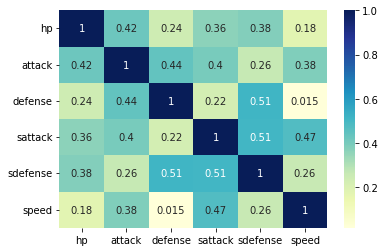

In [40]:
sns.heatmap(pokemon_df[numeric_cols].corr(), cmap = "YlGnBu", annot = True)
plt.show()

# Visualizing the plot of 
**( i ) `attack` vs `defence`**<br>
**( ii ) `sattack` vs `sdefence`**
# `scatterplot`
**Scatterplots can be used to visualize relationship between two continuos variables.**

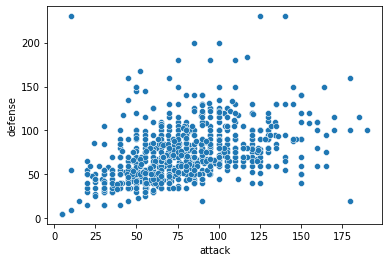

In [41]:
sns.scatterplot(
    x = pokemon_df["attack"],
    y = pokemon_df["defense"],
)

plt.show()

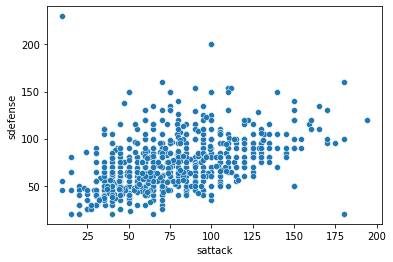

In [42]:
sns.scatterplot(
    x = pokemon_df["sattack"],
    y = pokemon_df["sdefense"],
)

plt.show()

# Visualizing frequency distribution of
**( i ) Pokemon Type (Categorical Variable)**<br>
# `countplot`
**X-Axis will have disrete values.**

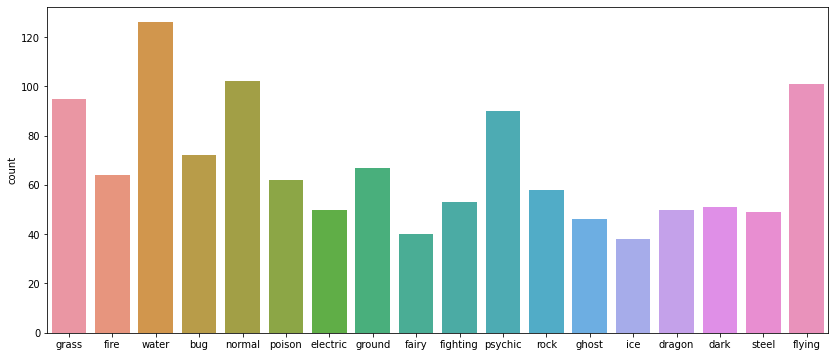

In [43]:
# Frequency distribution of Pokemon type in pokemon_df
types = list(pokemon_df["type1"])
types.extend(list(pokemon_df["type2"]))
types.remove(np.nan)

plt.figure(figsize = (14, 6))
sns.countplot(x = types)
plt.show()

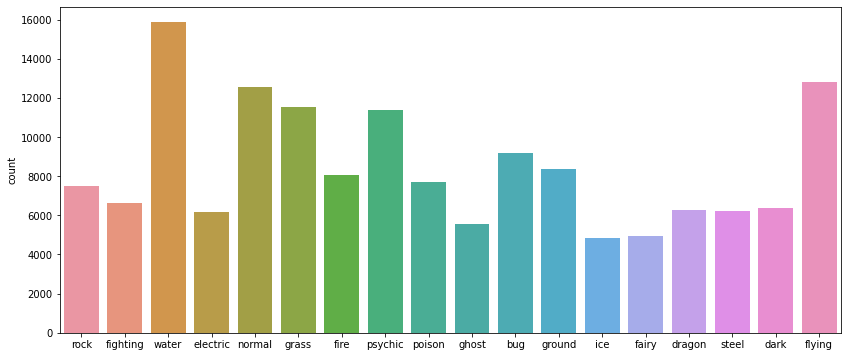

In [44]:
# Frequency distribution of Pokemon type in combats_df
types = list(merge_df["type1_pok1"])
types.extend(list(merge_df["type2_pok1"]))
types.extend(list(merge_df["type1_pok2"]))
types.extend(list(merge_df["type2_pok2"]))
types.remove(np.nan)

plt.figure(figsize = (14, 6))
sns.countplot(x = types)
plt.show()

**( ii ) HP, attack, defense, sattack, sdefense, speed (Continuous Variables)**
# `histplot`
**X-Axis will have continuos values.**

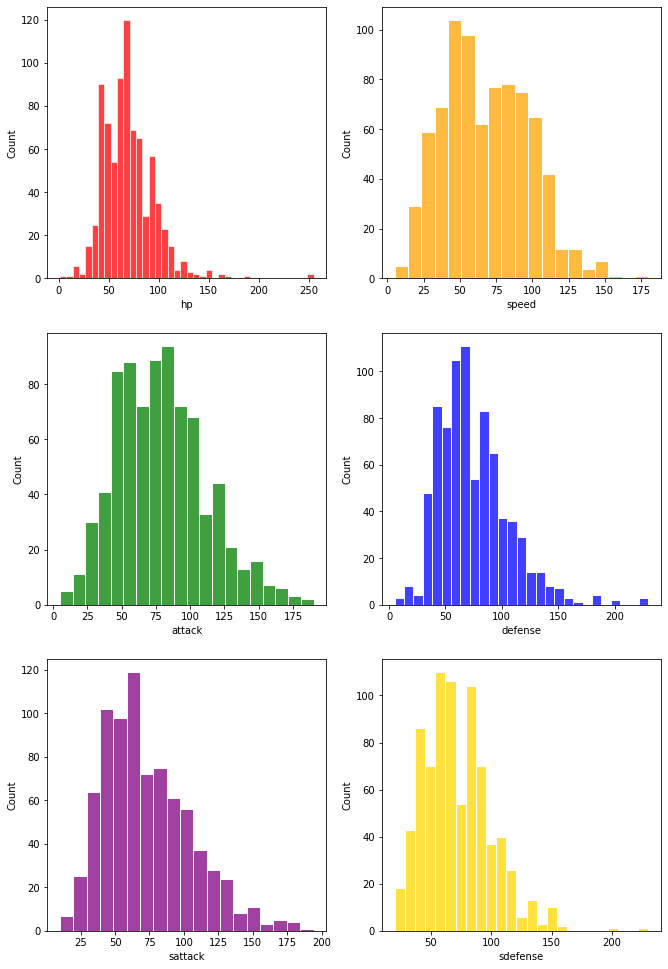

In [45]:
# Creating subplots
fig, ax = plt.subplots(3, 2, figsize = (11, 17))
sns.set_style("darkgrid")

# Frequency distribution of HP
sns.histplot(
    pokemon_df["hp"],
    ax = ax[0, 0],
    color = "red"
)

# Frequency distribution of speed
sns.histplot(
    pokemon_df["speed"],
    ax = ax[0, 1],
    color = "orange"
)

# Frequency distribution of attack
sns.histplot(
    pokemon_df["attack"],
    ax = ax[1, 0],
    color = "green"
)
# Frequency distribution of defense
sns.histplot(
    pokemon_df["defense"],
    ax = ax[1, 1],
    color = "blue"
)
# Frequency distribution of sattack
sns.histplot(
    pokemon_df["sattack"],
    ax = ax[2, 0],
    color = "purple"
)
# Frequency distribution of sdefense
sns.histplot(
    pokemon_df["sdefense"],
    ax = ax[2, 1],
    color = "gold"
)


plt.show()

# Check for outliers
# `boxplot`
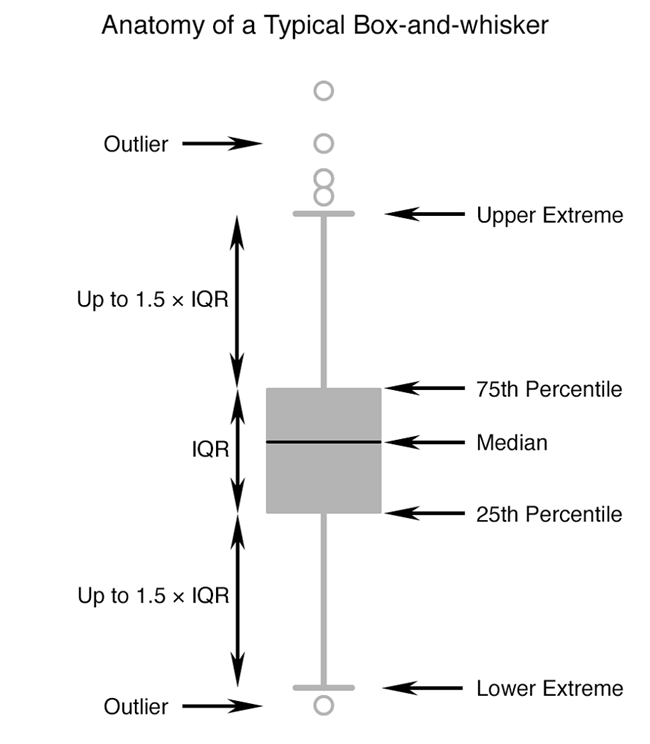

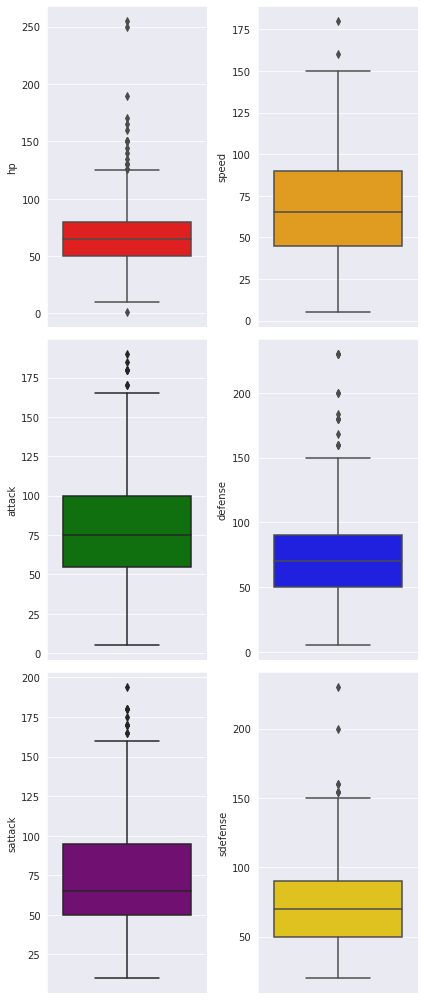

In [47]:
# Creating subplots
fig, ax = plt.subplots(3, 2, figsize = (6, 14))
sns.set_style("darkgrid")


# Boxplot of HP
sns.boxplot(
    y = pokemon_df["hp"],
    ax = ax[0, 0],
    color = "red"
)

# Boxplot of speed
sns.boxplot(
    y = pokemon_df["speed"],
    ax = ax[0, 1],
    color = "orange"
)

# Boxplot of attack
sns.boxplot(
    y = pokemon_df["attack"],
    ax = ax[1, 0],
    color = "green"
)
# Boxplot of defense
sns.boxplot(
    y = pokemon_df["defense"],
    ax = ax[1, 1],
    color = "blue"
)
# Boxplot of sattack
sns.boxplot(
    y = pokemon_df["sattack"],
    ax = ax[2, 0],
    color = "purple"
)
# Boxplot of sdefense
sns.boxplot(
    y = pokemon_df["sdefense"],
    ax = ax[2, 1],
    color = "gold"
)

plt.tight_layout()
plt.show()

# `violinplot`
**Additionally shows the data distribution.**

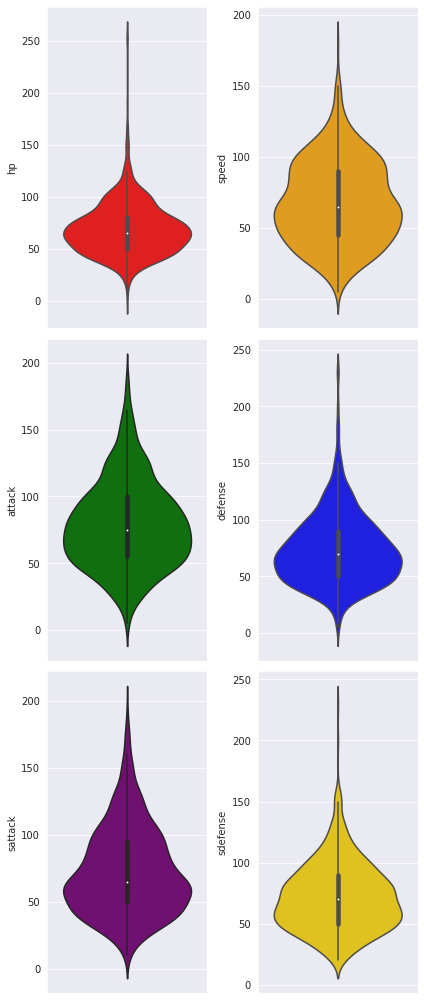

In [48]:
# Creating subplots
fig, ax = plt.subplots(3, 2, figsize = (6, 14))
sns.set_style("darkgrid")


# Violinplot of HP
sns.violinplot(
    y = pokemon_df["hp"],
    ax = ax[0, 0],
    color = "red"
)

# Violinplot of speed
sns.violinplot(
    y = pokemon_df["speed"],
    ax = ax[0, 1],
    color = "orange"
)

# Violinplot of attack
sns.violinplot(
    y = pokemon_df["attack"],
    ax = ax[1, 0],
    color = "green"
)

# Violinplot of defense
sns.violinplot(
    y = pokemon_df["defense"],
    ax = ax[1, 1],
    color = "blue"
)
# Violinplot of sattack
sns.violinplot(
    y = pokemon_df["sattack"],
    ax = ax[2, 0],
    color = "purple"
)
# Violinplot of sdefense
sns.violinplot(
    y = pokemon_df["sdefense"],
    ax = ax[2, 1],
    color = "gold"
)

plt.tight_layout()
plt.show()

# **Feature Engineering**
**Creating new feature - `winning proportion`**

In [49]:
merge_df.head()

,id_pok1,name_pok1,type1_pok1,type2_pok1,hp_pok1,attack_pok1,defense_pok1,sattack_pok1,sdefense_pok1,speed_pok1,generation_pok1,legendary_pok1,id_pok2,name_pok2,type1_pok2,type2_pok2,hp_pok2,attack_pok2,defense_pok2,sattack_pok2,sdefense_pok2,speed_pok2,generation_pok2,legendary_pok2,Winner
0,266,larvitar,rock,ground,50,64,50,45,50,41,2,False,298,nuzleaf,grass,dark,70,70,40,60,40,60,3,False,1
1,73,machop,fighting,NaN,70,80,50,35,35,35,1,False,298,nuzleaf,grass,dark,70,70,40,60,40,60,3,False,1
2,373,whiscash,water,ground,110,78,73,76,71,60,3,False,298,nuzleaf,grass,dark,70,70,40,60,40,60,3,False,1
3,536,fan rotom,electric,flying,50,65,107,105,107,86,4,False,298,nuzleaf,grass,dark,70,70,40,60,40,60,3,False,0
4,368,zangoose,normal,NaN,73,115,60,60,60,90,3,False,298,nuzleaf,grass,dark,70,70,40,60,40,60,3,False,0


In [54]:
battles_count = pd.DataFrame(
    combats_df["First_pokemon"].append(
        combats_df["Second_pokemon"]
    ).value_counts()
)

winning_count = pd.DataFrame(combats_df["Winner"].value_counts())
battles_wins = battles_count.merge(winning_count, left_index = True, right_index = True)

battles_wins.columns = ["battles", "wins"]

battles_wins["winning_prop"] = battles_wins["wins"] / battles_wins["battles"]
battles_wins.head()

,battles,wins,winning_prop
163,164,152,0.926829
344,160,104,0.650000
667,159,21,0.132075
214,158,130,0.822785
758,158,108,0.683544


In [55]:
merge_df.head()

,id_pok1,name_pok1,type1_pok1,type2_pok1,hp_pok1,attack_pok1,defense_pok1,sattack_pok1,sdefense_pok1,speed_pok1,generation_pok1,legendary_pok1,id_pok2,name_pok2,type1_pok2,type2_pok2,hp_pok2,attack_pok2,defense_pok2,sattack_pok2,sdefense_pok2,speed_pok2,generation_pok2,legendary_pok2,Winner
0,266,larvitar,rock,ground,50,64,50,45,50,41,2,False,298,nuzleaf,grass,dark,70,70,40,60,40,60,3,False,1
1,73,machop,fighting,NaN,70,80,50,35,35,35,1,False,298,nuzleaf,grass,dark,70,70,40,60,40,60,3,False,1
2,373,whiscash,water,ground,110,78,73,76,71,60,3,False,298,nuzleaf,grass,dark,70,70,40,60,40,60,3,False,1
3,536,fan rotom,electric,flying,50,65,107,105,107,86,4,False,298,nuzleaf,grass,dark,70,70,40,60,40,60,3,False,0
4,368,zangoose,normal,NaN,73,115,60,60,60,90,3,False,298,nuzleaf,grass,dark,70,70,40,60,40,60,3,False,0


In [56]:
merge_df = merge_df.merge(
    battles_wins["winning_prop"], 
    left_on = "id_pok1",
    right_index = True
)

merge_df = merge_df.merge(
    battles_wins["winning_prop"], 
    left_on = "id_pok2",
    right_index = True,
    suffixes = ("", "_pok2")
)

cols = list(merge_df.columns)
cols[-2] = "winning_prop_pok1"
merge_df.columns = cols

In [57]:
merge_df.drop(["id_pok1", "id_pok2", "name_pok1", "name_pok2"], inplace = True, axis = 1)

In [58]:
merge_df.head()

,type1_pok1,type2_pok1,hp_pok1,attack_pok1,defense_pok1,sattack_pok1,sdefense_pok1,speed_pok1,generation_pok1,legendary_pok1,type1_pok2,type2_pok2,hp_pok2,attack_pok2,defense_pok2,sattack_pok2,sdefense_pok2,speed_pok2,generation_pok2,legendary_pok2,Winner,winning_prop_pok1,winning_prop_pok2
0,rock,ground,50,64,50,45,50,41,2,False,grass,dark,70,70,40,60,40,60,3,False,1,0.227273,0.424779
1,fighting,NaN,70,80,50,35,35,35,1,False,grass,dark,70,70,40,60,40,60,3,False,1,0.140000,0.424779
2,water,ground,110,78,73,76,71,60,3,False,grass,dark,70,70,40,60,40,60,3,False,1,0.333333,0.424779
3,electric,flying,50,65,107,105,107,86,4,False,grass,dark,70,70,40,60,40,60,3,False,0,0.727273,0.424779
4,normal,NaN,73,115,60,60,60,90,3,False,grass,dark,70,70,40,60,40,60,3,False,0,0.669492,0.424779


# **Data Preparation**
**`Machines can learn only from numbers`**

# OneHot Encoding for Nominal categorical data

In [59]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49865 entries, 0 to 19134
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   type1_pok1         49865 non-null  object 
 1   type2_pok1         25867 non-null  object 
 2   hp_pok1            49865 non-null  int64  
 3   attack_pok1        49865 non-null  int64  
 4   defense_pok1       49865 non-null  int64  
 5   sattack_pok1       49865 non-null  int64  
 6   sdefense_pok1      49865 non-null  int64  
 7   speed_pok1         49865 non-null  int64  
 8   generation_pok1    49865 non-null  int64  
 9   legendary_pok1     49865 non-null  bool   
 10  type1_pok2         49865 non-null  object 
 11  type2_pok2         25921 non-null  object 
 12  hp_pok2            49865 non-null  int64  
 13  attack_pok2        49865 non-null  int64  
 14  defense_pok2       49865 non-null  int64  
 15  sattack_pok2       49865 non-null  int64  
 16  sdefense_pok2      498

In [61]:
cat_cols = [
    "type1_pok1", "type2_pok1",
    "generation_pok1",
    "type1_pok2", "type2_pok2",
    "generation_pok2",
]

merge_df[cat_cols] = merge_df[cat_cols].astype("category")

In [62]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49865 entries, 0 to 19134
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   type1_pok1         49865 non-null  category
 1   type2_pok1         25867 non-null  category
 2   hp_pok1            49865 non-null  int64   
 3   attack_pok1        49865 non-null  int64   
 4   defense_pok1       49865 non-null  int64   
 5   sattack_pok1       49865 non-null  int64   
 6   sdefense_pok1      49865 non-null  int64   
 7   speed_pok1         49865 non-null  int64   
 8   generation_pok1    49865 non-null  category
 9   legendary_pok1     49865 non-null  bool    
 10  type1_pok2         49865 non-null  category
 11  type2_pok2         25921 non-null  category
 12  hp_pok2            49865 non-null  int64   
 13  attack_pok2        49865 non-null  int64   
 14  defense_pok2       49865 non-null  int64   
 15  sattack_pok2       49865 non-null  int64   
 16  sdef

In [63]:
merge_df = pd.get_dummies(
    merge_df,
    drop_first = True
)

In [64]:
merge_df.head()

,hp_pok1,attack_pok1,defense_pok1,sattack_pok1,sdefense_pok1,speed_pok1,legendary_pok1,hp_pok2,attack_pok2,defense_pok2,sattack_pok2,sdefense_pok2,speed_pok2,legendary_pok2,Winner,winning_prop_pok1,winning_prop_pok2,type1_pok1_dark,type1_pok1_dragon,type1_pok1_electric,type1_pok1_fairy,type1_pok1_fighting,type1_pok1_fire,type1_pok1_flying,type1_pok1_ghost,type1_pok1_grass,type1_pok1_ground,type1_pok1_ice,type1_pok1_normal,type1_pok1_poison,type1_pok1_psychic,type1_pok1_rock,type1_pok1_steel,type1_pok1_water,type2_pok1_dark,type2_pok1_dragon,type2_pok1_electric,type2_pok1_fairy,type2_pok1_fighting,type2_pok1_fire,type2_pok1_flying,type2_pok1_ghost,type2_pok1_grass,type2_pok1_ground,type2_pok1_ice,type2_pok1_normal,type2_pok1_poison,type2_pok1_psychic,type2_pok1_rock,type2_pok1_steel,type2_pok1_water,generation_pok1_2,generation_pok1_3,generation_pok1_4,generation_pok1_5,generation_pok1_6,type1_pok2_dark,type1_pok2_dragon,type1_pok2_electric,type1_pok2_fairy,type1_pok2_fighting,type1_pok2_fire,type1_pok2_flying,type1_pok2_ghost,type1_pok2_grass,type1_pok2_ground,type1_pok2_ice,type1_pok2_normal,type1_pok2_poison,type1_pok2_psychic,type1_pok2_rock,type1_pok2_steel,type1_pok2_water,type2_pok2_dark,type2_pok2_dragon,type2_pok2_electric,type2_pok2_fairy,type2_pok2_fighting,type2_pok2_fire,type2_pok2_flying,type2_pok2_ghost,type2_pok2_grass,type2_pok2_ground,type2_pok2_ice,type2_pok2_normal,type2_pok2_poison,type2_pok2_psychic,type2_pok2_rock,type2_pok2_steel,type2_pok2_water,generation_pok2_2,generation_pok2_3,generation_pok2_4,generation_pok2_5,generation_pok2_6
0,50,64,50,45,50,41,False,70,70,40,60,40,60,False,1,0.227273,0.424779,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,70,80,50,35,35,35,False,70,70,40,60,40,60,False,1,0.140000,0.424779,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,110,78,73,76,71,60,False,70,70,40,60,40,60,False,1,0.333333,0.424779,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,50,65,107,105,107,86,False,70,70,40,60,40,60,False,0,0.727273,0.424779,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,73,115,60,60,60,90,False,70,70,40,60,40,60,False,0,0.669492,0.424779,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [65]:
from sklearn.preprocessing import MinMaxScaler

numeric_cols = [
    "hp_pok1", "hp_pok2",
    "attack_pok1", "attack_pok2",
    "defense_pok1", "defense_pok2",
    "sattack_pok1", "sattack_pok2",
    "sdefense_pok1", "sdefense_pok2",
    "speed_pok1", "speed_pok2"
]

cls_normalizer = MinMaxScaler()
merge_df[numeric_cols] = cls_normalizer.fit_transform(merge_df[numeric_cols])

In [66]:
reg_normalizer = MinMaxScaler()

pokemon_df[["attack", "defense", "sattack", "sdefense", "speed"]] = reg_normalizer.fit_transform(
    pokemon_df[["attack", "defense", "sattack", "sdefense", "speed"]]
)

target_normalizer = MinMaxScaler()
pokemon_df[["hp"]] = target_normalizer.fit_transform(pokemon_df[["hp"]])

In [67]:
merge_df.head()

,hp_pok1,attack_pok1,defense_pok1,sattack_pok1,sdefense_pok1,speed_pok1,legendary_pok1,hp_pok2,attack_pok2,defense_pok2,sattack_pok2,sdefense_pok2,speed_pok2,legendary_pok2,Winner,winning_prop_pok1,winning_prop_pok2,type1_pok1_dark,type1_pok1_dragon,type1_pok1_electric,type1_pok1_fairy,type1_pok1_fighting,type1_pok1_fire,type1_pok1_flying,type1_pok1_ghost,type1_pok1_grass,type1_pok1_ground,type1_pok1_ice,type1_pok1_normal,type1_pok1_poison,type1_pok1_psychic,type1_pok1_rock,type1_pok1_steel,type1_pok1_water,type2_pok1_dark,type2_pok1_dragon,type2_pok1_electric,type2_pok1_fairy,type2_pok1_fighting,type2_pok1_fire,type2_pok1_flying,type2_pok1_ghost,type2_pok1_grass,type2_pok1_ground,type2_pok1_ice,type2_pok1_normal,type2_pok1_poison,type2_pok1_psychic,type2_pok1_rock,type2_pok1_steel,type2_pok1_water,generation_pok1_2,generation_pok1_3,generation_pok1_4,generation_pok1_5,generation_pok1_6,type1_pok2_dark,type1_pok2_dragon,type1_pok2_electric,type1_pok2_fairy,type1_pok2_fighting,type1_pok2_fire,type1_pok2_flying,type1_pok2_ghost,type1_pok2_grass,type1_pok2_ground,type1_pok2_ice,type1_pok2_normal,type1_pok2_poison,type1_pok2_psychic,type1_pok2_rock,type1_pok2_steel,type1_pok2_water,type2_pok2_dark,type2_pok2_dragon,type2_pok2_electric,type2_pok2_fairy,type2_pok2_fighting,type2_pok2_fire,type2_pok2_flying,type2_pok2_ghost,type2_pok2_grass,type2_pok2_ground,type2_pok2_ice,type2_pok2_normal,type2_pok2_poison,type2_pok2_psychic,type2_pok2_rock,type2_pok2_steel,type2_pok2_water,generation_pok2_2,generation_pok2_3,generation_pok2_4,generation_pok2_5,generation_pok2_6
0,0.192913,0.318919,0.200000,0.190217,0.166667,0.205714,False,0.271654,0.351351,0.155556,0.271739,0.111111,0.314286,False,1,0.227273,0.424779,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.271654,0.405405,0.200000,0.135870,0.083333,0.171429,False,0.271654,0.351351,0.155556,0.271739,0.111111,0.314286,False,1,0.140000,0.424779,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0.429134,0.394595,0.302222,0.358696,0.283333,0.314286,False,0.271654,0.351351,0.155556,0.271739,0.111111,0.314286,False,1,0.333333,0.424779,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0.192913,0.324324,0.453333,0.516304,0.483333,0.462857,False,0.271654,0.351351,0.155556,0.271739,0.111111,0.314286,False,0,0.727273,0.424779,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0.283465,0.594595,0.244444,0.271739,0.222222,0.485714,False,0.271654,0.351351,0.155556,0.271739,0.111111,0.314286,False,0,0.669492,0.424779,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [68]:
pokemon_df[["attack", "defense", "sattack", "sdefense", "speed", "hp"]].head()

,attack,defense,sattack,sdefense,speed,hp
0,0.237838,0.195556,0.298913,0.214286,0.228571,0.173228
1,0.308108,0.257778,0.380435,0.285714,0.314286,0.232283
2,0.416216,0.346667,0.489130,0.380952,0.428571,0.311024
3,0.513514,0.524444,0.608696,0.476190,0.428571,0.311024
4,0.254054,0.168889,0.271739,0.142857,0.342857,0.149606


In [71]:
merge_df[["legendary_pok1", "legendary_pok2", "Winner"]] = merge_df[
    ["legendary_pok1", "legendary_pok2", "Winner"]
].astype("uint8")

In [72]:
display(merge_df.head())
print(merge_df.info())

,hp_pok1,attack_pok1,defense_pok1,sattack_pok1,sdefense_pok1,speed_pok1,legendary_pok1,hp_pok2,attack_pok2,defense_pok2,sattack_pok2,sdefense_pok2,speed_pok2,legendary_pok2,Winner,winning_prop_pok1,winning_prop_pok2,type1_pok1_dark,type1_pok1_dragon,type1_pok1_electric,type1_pok1_fairy,type1_pok1_fighting,type1_pok1_fire,type1_pok1_flying,type1_pok1_ghost,type1_pok1_grass,type1_pok1_ground,type1_pok1_ice,type1_pok1_normal,type1_pok1_poison,type1_pok1_psychic,type1_pok1_rock,type1_pok1_steel,type1_pok1_water,type2_pok1_dark,type2_pok1_dragon,type2_pok1_electric,type2_pok1_fairy,type2_pok1_fighting,type2_pok1_fire,type2_pok1_flying,type2_pok1_ghost,type2_pok1_grass,type2_pok1_ground,type2_pok1_ice,type2_pok1_normal,type2_pok1_poison,type2_pok1_psychic,type2_pok1_rock,type2_pok1_steel,type2_pok1_water,generation_pok1_2,generation_pok1_3,generation_pok1_4,generation_pok1_5,generation_pok1_6,type1_pok2_dark,type1_pok2_dragon,type1_pok2_electric,type1_pok2_fairy,type1_pok2_fighting,type1_pok2_fire,type1_pok2_flying,type1_pok2_ghost,type1_pok2_grass,type1_pok2_ground,type1_pok2_ice,type1_pok2_normal,type1_pok2_poison,type1_pok2_psychic,type1_pok2_rock,type1_pok2_steel,type1_pok2_water,type2_pok2_dark,type2_pok2_dragon,type2_pok2_electric,type2_pok2_fairy,type2_pok2_fighting,type2_pok2_fire,type2_pok2_flying,type2_pok2_ghost,type2_pok2_grass,type2_pok2_ground,type2_pok2_ice,type2_pok2_normal,type2_pok2_poison,type2_pok2_psychic,type2_pok2_rock,type2_pok2_steel,type2_pok2_water,generation_pok2_2,generation_pok2_3,generation_pok2_4,generation_pok2_5,generation_pok2_6
0,0.192913,0.318919,0.200000,0.190217,0.166667,0.205714,0,0.271654,0.351351,0.155556,0.271739,0.111111,0.314286,0,1,0.227273,0.424779,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.271654,0.405405,0.200000,0.135870,0.083333,0.171429,0,0.271654,0.351351,0.155556,0.271739,0.111111,0.314286,0,1,0.140000,0.424779,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0.429134,0.394595,0.302222,0.358696,0.283333,0.314286,0,0.271654,0.351351,0.155556,0.271739,0.111111,0.314286,0,1,0.333333,0.424779,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0.192913,0.324324,0.453333,0.516304,0.483333,0.462857,0,0.271654,0.351351,0.155556,0.271739,0.111111,0.314286,0,0,0.727273,0.424779,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0.283465,0.594595,0.244444,0.271739,0.222222,0.485714,0,0.271654,0.351351,0.155556,0.271739,0.111111,0.314286,0,0,0.669492,0.424779,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 49865 entries, 0 to 19134
Data columns (total 95 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   hp_pok1              49865 non-null  float64
 1   attack_pok1          49865 non-null  float64
 2   defense_pok1         49865 non-null  float64
 3   sattack_pok1         49865 non-null  float64
 4   sdefense_pok1        49865 non-null  float64
 5   speed_pok1           49865 non-null  float64
 6   legendary_pok1       49865 non-null  uint8  
 7   hp_pok2              49865 non-null  float64
 8   attack_pok2          49865 non-null  float64
 9   defense_pok2         49865 non-null  float64
 10  sattack_pok2         49865 non-null  float64
 11  sdefense_pok2        49865 non-null  float64
 12  speed_pok2           49865 non-null  float64
 13  legendary_pok2       49865 non-null  uint8  
 14  Winner               49865 non-null  uint8  
 15  winning_prop_pok1    49865 non-null 

In [73]:
type1_pok1_cols = list(merge_df.columns[17:34])
type2_pok1_cols = list(merge_df.columns[34:51])
type1_pok2_cols = list(merge_df.columns[56:73])
type2_pok2_cols = list(merge_df.columns[73:90])

In [74]:
merge_df[type1_pok1_cols] = merge_df[type1_pok1_cols].values + merge_df[type2_pok1_cols].values
merge_df[type1_pok2_cols] = merge_df[type1_pok2_cols].values + merge_df[type2_pok2_cols].values

merge_df.drop(type2_pok1_cols + type2_pok2_cols, inplace =  True, axis = 1)

In [75]:
merge_df.head()

,hp_pok1,attack_pok1,defense_pok1,sattack_pok1,sdefense_pok1,speed_pok1,legendary_pok1,hp_pok2,attack_pok2,defense_pok2,sattack_pok2,sdefense_pok2,speed_pok2,legendary_pok2,Winner,winning_prop_pok1,winning_prop_pok2,type1_pok1_dark,type1_pok1_dragon,type1_pok1_electric,type1_pok1_fairy,type1_pok1_fighting,type1_pok1_fire,type1_pok1_flying,type1_pok1_ghost,type1_pok1_grass,type1_pok1_ground,type1_pok1_ice,type1_pok1_normal,type1_pok1_poison,type1_pok1_psychic,type1_pok1_rock,type1_pok1_steel,type1_pok1_water,generation_pok1_2,generation_pok1_3,generation_pok1_4,generation_pok1_5,generation_pok1_6,type1_pok2_dark,type1_pok2_dragon,type1_pok2_electric,type1_pok2_fairy,type1_pok2_fighting,type1_pok2_fire,type1_pok2_flying,type1_pok2_ghost,type1_pok2_grass,type1_pok2_ground,type1_pok2_ice,type1_pok2_normal,type1_pok2_poison,type1_pok2_psychic,type1_pok2_rock,type1_pok2_steel,type1_pok2_water,generation_pok2_2,generation_pok2_3,generation_pok2_4,generation_pok2_5,generation_pok2_6
0,0.192913,0.318919,0.200000,0.190217,0.166667,0.205714,0,0.271654,0.351351,0.155556,0.271739,0.111111,0.314286,0,1,0.227273,0.424779,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.271654,0.405405,0.200000,0.135870,0.083333,0.171429,0,0.271654,0.351351,0.155556,0.271739,0.111111,0.314286,0,1,0.140000,0.424779,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0.429134,0.394595,0.302222,0.358696,0.283333,0.314286,0,0.271654,0.351351,0.155556,0.271739,0.111111,0.314286,0,1,0.333333,0.424779,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0.192913,0.324324,0.453333,0.516304,0.483333,0.462857,0,0.271654,0.351351,0.155556,0.271739,0.111111,0.314286,0,0,0.727273,0.424779,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0.283465,0.594595,0.244444,0.271739,0.222222,0.485714,0,0.271654,0.351351,0.155556,0.271739,0.111111,0.314286,0,0,0.669492,0.424779,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


# Reorder columns for our convenience

In [76]:
pok1_cols = [x for x in merge_df.columns if 'pok1' in x]
pok2_cols = [x for x in merge_df.columns if 'pok2' in x]
target = ["winner"]

merge_df.columns = pok1_cols + pok2_cols + target

In [77]:
display(merge_df.head())
print(merge_df.info())

,hp_pok1,attack_pok1,defense_pok1,sattack_pok1,sdefense_pok1,speed_pok1,legendary_pok1,winning_prop_pok1,type1_pok1_dark,type1_pok1_dragon,type1_pok1_electric,type1_pok1_fairy,type1_pok1_fighting,type1_pok1_fire,type1_pok1_flying,type1_pok1_ghost,type1_pok1_grass,type1_pok1_ground,type1_pok1_ice,type1_pok1_normal,type1_pok1_poison,type1_pok1_psychic,type1_pok1_rock,type1_pok1_steel,type1_pok1_water,generation_pok1_2,generation_pok1_3,generation_pok1_4,generation_pok1_5,generation_pok1_6,hp_pok2,attack_pok2,defense_pok2,sattack_pok2,sdefense_pok2,speed_pok2,legendary_pok2,winning_prop_pok2,type1_pok2_dark,type1_pok2_dragon,type1_pok2_electric,type1_pok2_fairy,type1_pok2_fighting,type1_pok2_fire,type1_pok2_flying,type1_pok2_ghost,type1_pok2_grass,type1_pok2_ground,type1_pok2_ice,type1_pok2_normal,type1_pok2_poison,type1_pok2_psychic,type1_pok2_rock,type1_pok2_steel,type1_pok2_water,generation_pok2_2,generation_pok2_3,generation_pok2_4,generation_pok2_5,generation_pok2_6,winner
0,0.192913,0.318919,0.200000,0.190217,0.166667,0.205714,0,0.271654,0.351351,0.155556,0.271739,0.111111,0.314286,0,1,0.227273,0.424779,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.271654,0.405405,0.200000,0.135870,0.083333,0.171429,0,0.271654,0.351351,0.155556,0.271739,0.111111,0.314286,0,1,0.140000,0.424779,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0.429134,0.394595,0.302222,0.358696,0.283333,0.314286,0,0.271654,0.351351,0.155556,0.271739,0.111111,0.314286,0,1,0.333333,0.424779,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0.192913,0.324324,0.453333,0.516304,0.483333,0.462857,0,0.271654,0.351351,0.155556,0.271739,0.111111,0.314286,0,0,0.727273,0.424779,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0.283465,0.594595,0.244444,0.271739,0.222222,0.485714,0,0.271654,0.351351,0.155556,0.271739,0.111111,0.314286,0,0,0.669492,0.424779,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 49865 entries, 0 to 19134
Data columns (total 61 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   hp_pok1              49865 non-null  float64
 1   attack_pok1          49865 non-null  float64
 2   defense_pok1         49865 non-null  float64
 3   sattack_pok1         49865 non-null  float64
 4   sdefense_pok1        49865 non-null  float64
 5   speed_pok1           49865 non-null  float64
 6   legendary_pok1       49865 non-null  uint8  
 7   winning_prop_pok1    49865 non-null  float64
 8   type1_pok1_dark      49865 non-null  float64
 9   type1_pok1_dragon    49865 non-null  float64
 10  type1_pok1_electric  49865 non-null  float64
 11  type1_pok1_fairy     49865 non-null  float64
 12  type1_pok1_fighting  49865 non-null  float64
 13  type1_pok1_fire      49865 non-null  uint8  
 14  type1_pok1_flying    49865 non-null  uint8  
 15  type1_pok1_ghost     49865 non-null 

# **Exporting Files**

# `pickle` and `.to_csv()`

In [78]:
with open("cls_normalizer.pickle", 'wb') as f:
    pickle.dump(cls_normalizer, f)
    
with open("reg_normalizer.pickle", 'wb') as f:
    pickle.dump(reg_normalizer, f)

with open("reg_target_normalizer.pickle", 'wb') as f:
    pickle.dump(target_normalizer, f)

    

merge_df.to_csv("classification data.csv", index = False)

pokemon_df[
    ["attack", "defense", "sattack", "sdefense", "speed", "hp"]
].to_csv("regression data.csv", index = False)

In [79]:
!ls

 __notebook_source__.ipynb   reg_normalizer.pickle
'classification data.csv'    reg_target_normalizer.pickle
 cls_normalizer.pickle	    'regression data.csv'
